# Python pour DATA

Python est un langage puissant et polyvalent et l'un des domaines dans lesquels il est le plus utilisé est celui de la DATA.

Par DATA nous entendons le domaine dans lequel il y un travail avec des informations de toutes sortes, en grand nombre et même très volumineuses  (des données).

Les données collectées se présentent sous différentes formes eventuellement incomplètes ou erronées.

Par conséquent, afin de pouvoir travailler avec elles, nous devrons les traiter au début de chaque projet.


### Cas d'étude

Pour la pratique, nous considérons l'étude de cas suivant :

Demandez à un acheteur de maison de décrire la maison de ses rêves, il ne commencera probablement pas par la hauteur du plafond du sous-sol ou bien la proximité d'une voie ferrée.
Cependant l'ensemble des données montrent que beaucoup d'éléments influencent les négociations sur le prix au delà du nombre de chambres ou une bien la présence d'uen clôture blanche.

Avec 79 variables explicatives décrivant (presque) tous les aspects des maisons résidentielles à Ames, Iowa, ce dataset est un bon candidat pour montrer les possibilités de python pour sur les données 

In [64]:
# Avant de commencer, assurez-vous que les packages sont installés : pandas, matplotlib, seaborn, scikit-learn,...
# Pour ça, utilisez pip install in IDE terminal 
# Par example, pip install -U scikit-learn 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



Nous devons d'abord collecter les données ou les importer à partir d'une source secondaire. Ci-dessous la liste des étapes que nous allons suivre:

1. Collecter les données / Importer les données depuis la source.

2. Décrire les données/l'ensemble de données

3. Effectuer le prétraitement des données (les 4 "C")

 - Corrigez les données

 - Créez les données

 - Compléter les données

 - Convertir les données

4. Analyse exploratoire des données

5. Ingénierie des fonctionnalités

6. Sélection des fonctionnalités

## 1. Import les Data/Dataset

À la source, un ensembles de données sont disponibles.

- entraînement train.csv

Tous ces ensembles de données seront utilisés pour la prédiction requise

In [65]:
# Importer les données depuis la source
train_data = pd.read_csv(r"C:\Users\gkerd\OneDrive\Bureau\Cours et Exercices\Formation IA\2ème semaine\Projet_Digitalisation\Dataset\train.csv")


Afin de voir nos données, nous sélectionnerons l'échantillon de 5 des données pour examiner les données de train / test.

In [66]:
# imprimer l'échantillon des données
train_data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
713,714,190,RL,60.0,9873,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,129000
1146,1147,20,RL,NaN,11200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,180000
392,393,20,RL,NaN,8339,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1200,7,2007,WD,Normal,106500
698,699,20,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal,138500
1281,1282,20,RL,50.0,8049,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,180000


## 2. Décrire l'ensemble de données
Cela signifie la forme des ensembles de données train et test.

In [67]:
# la forme des ensembles de données
print("train ont lignes et colonnes:",train_data.shape)


train ont lignes et colonnes: (1460, 81)


In [68]:
# informations sur les data
# Cela signifie : les nomes, le type de données, leur nombre, si elles sont complètes ou non, la mémoire allouée, etc.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Décrire les statistiques descriptives des données

In [69]:
#décrire les statistiques dans les données, la colonne count
train_data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


### Vérifiez les valeurs nulles pour chaque colonne

In [70]:
# vérifier le nettoyage des données, les 4c : corriger, compléter, créer, convertir
# vérifier les valeurs nulles pour chaque colonne
train_data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

## 3. Nettoyage des données

In [71]:
# supprimons les colonnes qui ont trop valeurs nulles, elles ne sont pas utiles pour la prediction
train_data.drop(['Id','PoolQC','Fence','MiscFeature','Alley'], axis=1, inplace=True)


In [72]:
train_data.select_dtypes(include='O').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [73]:
# Le résultat après avoir corrigé les problèmes de valeurs nulles
train_data.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

In [74]:
# On peut obtenir des informations générales pour chaque colonnes
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [75]:

import re
def create_new_feature(data):
    dt = re.findall(r'\d+\.*\d*', str(data))
    if dt:
        return float(dt[0])
    else:
        return 1
    
def create_new_cat_feature(data):
    dt = re.findall(r'[a-zA-Z]+', str(data))
    if dt:
        return str(dt[0])
    else:
        None
        
for col in ['LotShape','BldgType','HouseStyle']:
    train_data[str(col)+'_n'] = train_data[col].apply(create_new_feature)
    train_data[col] = train_data[col].apply(create_new_cat_feature)

    

In [76]:
# Il est possible de regarder un échantillon choisi au hasard dans le data set
train_data.sample(10)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotShape_n,BldgType_n,HouseStyle_n
40,20,RL,84.0,8658,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,12,2006,WD,Abnorml,160000,1.0,1.0,1.0
439,50,RL,67.0,12354,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,800,8,2009,ConLI,Normal,110000,1.0,1.0,1.5
1254,60,RL,60.0,6931,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,7,2008,WD,Normal,165400,1.0,1.0,2.0
1164,80,RL,NaN,16157,Pave,IR,Lvl,AllPub,FR2,Gtl,...,0,0,6,2007,WD,Normal,194000,1.0,1.0,1.0
782,20,RL,67.0,16285,Pave,IR,Lvl,AllPub,Inside,Gtl,...,0,0,6,2009,WD,Normal,187100,2.0,1.0,1.0
922,20,RL,65.0,10237,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,10,2006,New,Partial,169990,1.0,1.0,1.0
804,20,RL,75.0,9000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,6,2006,WD,Family,118000,1.0,1.0,1.0
279,60,RL,83.0,10005,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,3,2008,WD,Normal,192000,1.0,1.0,2.0
107,20,RM,50.0,6000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,4,2008,WD,Partial,115000,1.0,1.0,1.0
657,70,RL,60.0,7200,Pave,Reg,HLS,AllPub,Inside,Mod,...,0,0,2,2008,WD,Normal,149000,1.0,1.0,2.0


#### Imputer les données manquantes.

In [77]:
from sklearn.impute import SimpleImputer


## pour les données numeriques, remplacement par la moyenne
smplimput = SimpleImputer(strategy='mean')
train_data1 = pd.DataFrame(smplimput.fit_transform(train_data.select_dtypes(exclude='O')), columns=train_data.select_dtypes(exclude='O').columns)

## pour les données catégoriques, remplacement par le mode
smplimput2 = SimpleImputer(strategy='most_frequent')
train_data2 = pd.DataFrame(smplimput2.fit_transform(train_data.select_dtypes(include='O')), columns=train_data.select_dtypes(include='O').columns)


In [78]:
# Il n'y a plus de données manquantes
print(train_data1.isna().sum().sum(), train_data2.isna().sum().sum())

0 0


In [79]:
train_data.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotShape_n,BldgType_n,HouseStyle_n
985,190,RL,68.0,10880,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,8,2008,ConLD,Normal,125000,1.0,2.0,1.0
904,20,RL,NaN,6173,Pave,IR,Lvl,AllPub,Inside,Gtl,...,0,0,8,2007,WD,Normal,125500,1.0,1.0,1.0
398,30,RM,60.0,8967,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,11,2007,WD,Abnorml,67000,1.0,1.0,1.0
891,60,RL,70.0,11184,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,7,2009,WD,Normal,172500,1.0,1.0,2.0
1008,20,RL,43.0,12118,Pave,IR,Lvl,AllPub,CulDSac,Gtl,...,0,0,4,2009,WD,Normal,240000,1.0,1.0,1.0
1200,20,RL,71.0,9353,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,7,2006,Oth,Abnorml,116050,1.0,1.0,1.0
1224,60,RL,60.0,15384,Pave,IR,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,184000,1.0,1.0,2.0
937,60,RL,75.0,9675,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2009,WD,Normal,253000,1.0,1.0,2.0
1239,20,RL,64.0,9037,Pave,IR,HLS,AllPub,Inside,Gtl,...,0,0,12,2007,WD,Normal,265900,1.0,1.0,1.0
547,85,RL,54.0,7244,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,4,2007,WD,Normal,129500,1.0,1.0,1.0


## 4. Data Analyse -  L'analyse exploratoire des données

Tracer les données avec des données valides et aberrantes en utilisant la MÉTHODE DE WINSORIZATION (CAPPING PERCENTILE).

Dans cette technique, nous plafonnons nos données aberrantes et établissons une limite, c'est-à-dire qu'au-dessus d'une valeur particulière ou inférieure à cette valeur, toutes les valeurs seront considérées comme des valeurs aberrantes, et le nombre de valeurs aberrantes dans l'ensemble de données donne ce nombre de plafonnement.

Cette méthode est similaire à la méthode IQR. Si une valeur dépasse la valeur du 99e centile ou est inférieure au 1er centile, elle est traitée comme une valeur aberrante.

In [80]:
# traiter/détecter les données aberrantes à l'aide de winsort
def detect_outlier(data):
    outlier=[]
    q1 = np.percentile(data , 1)
    q3 = np.percentile(data , 99)
    for i in data:
        if i > q3 or i < q1:
            outlier.append(True)
        else:
            outlier.append(False)
    return outlier

In [81]:
out_train = train_data.copy()


In [82]:
out_train.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotShape_n,BldgType_n,HouseStyle_n
1177,50,RM,NaN,3950,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,12,2009,WD,Normal,115000,1.0,1.0,1.5
425,60,RM,60.0,3378,Pave,Reg,HLS,AllPub,Inside,Gtl,...,0,0,9,2009,WD,Normal,135000,1.0,1.0,2.0
1383,30,RL,NaN,25339,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,8,2007,WD,Normal,112000,1.0,1.0,1.0
475,20,RL,80.0,8480,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,7,2007,WD,Normal,132500,1.0,1.0,1.0
1307,20,RL,60.0,8072,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,5,2009,WD,Normal,138000,1.0,1.0,1.0


In [83]:
# train_data.dtypes
def plot_vars(data, features, target):
    fig, axis = plt.subplots(len(features), 2, figsize=(20,200))
    for i, col in enumerate(features):
        data['Outlier'] = detect_outlier(data[col])
        sns.scatterplot(data=data, x=col, y=target, ax=axis[i, 0], hue='Outlier')
        sns.kdeplot(data=data, x=col, ax=axis[i, 1], hue='Outlier', warn_singular=False)

## Data visualization 

Nous pouvons catégoriser les données en deux grandes classes : les données numériques et les données catégorielles. Les catégorielles sont de types assez variés et on peut les organiser selon les catégories, c'est pour ça qu'on dit catégorielles. 


Par conséquent, nous allons faire la visualisation sur les deux grandes catégories de données.

La première concerne les données numériques et nous la mettrons en relation avec le prix de vente (SalePrice), ce qui est pertinent pour l'analyse proposée.

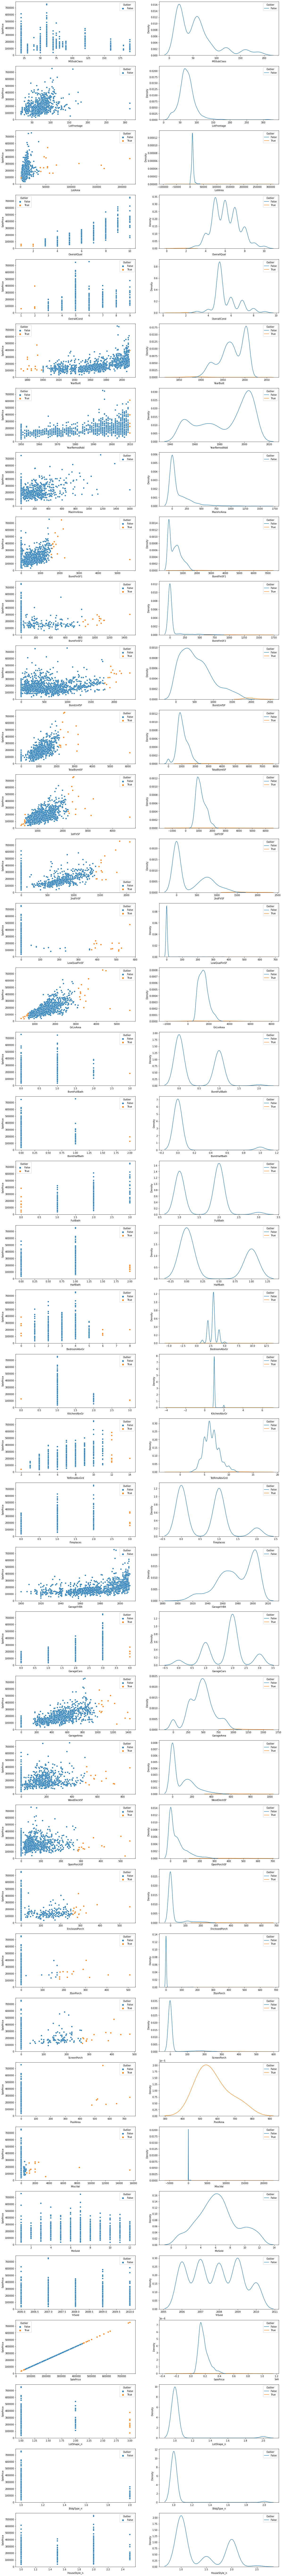

In [85]:
colmns = out_train.select_dtypes(exclude=['O']).columns
plot_vars(out_train, colmns, 'SalePrice')

### Tracer les données catégorielles du train data

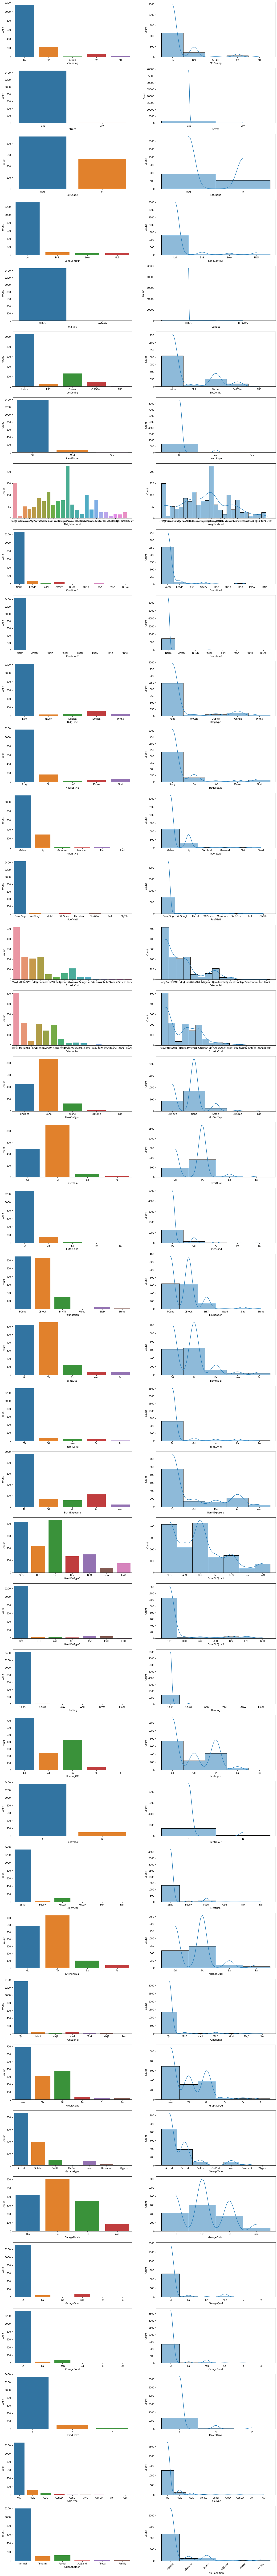

In [86]:
cat_colmns = train_data.select_dtypes(include='O').columns

def cate_plot(data, features):
    fig, axis = plt.subplots(len(features), 2, figsize=(20,200))
    for i, col in enumerate(features):
        sns.countplot(data=data, x=col, ax=axis[i, 0])
        plt.xticks(rotation=45)
        sns.histplot(data=data, x=col, ax=axis[i, 1], kde=True)
        plt.xticks(rotation=45)

cate_plot(out_train[cat_colmns].astype(str), cat_colmns)

Nous avons fait les 4c 

corriger

créer

compléter

convertir

À ce stade, les données sont prêtes pour des manipulation liées à l'apprentissage automatique (prédiction, classification, ....)






